In [1]:
import pandas as pd
import numpy as np
import requests
import os

## Gathering Data

Gather each of the three pieces of data as described

### 1st data: The WeRateDogs Twitter archive

In [2]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2nd data: The tweet image predictions through request

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
open('image-predictions.tsv', 'wb').write(response.content)

335079

In [4]:
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3rd data: Using Tweepy API for addtional information

In [6]:
# Setting up the Twitter API connection
import tweepy

consumer_key = ' '
consumer_secret = ' '
access_token = ' '
access_secret = ' '

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [7]:
# Testing the connection
try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


In [8]:
# Extracting data
count=0
tweet_data = []
tweetid_fail = []
tweetid_success = []

for tweet_id in twitter_archive_enhanced['tweet_id']:
    count+=1
    try:
        data = api.get_status(tweet_id, 
                              tweet_mode='extended',
                              wait_on_rate_limit = True,
                              wait_on_rate_limit_notify = True)
        tweet_data.append(data)
        tweetid_success.append(tweet_id)
        print(count,tweet_id , "Success")
        
    except:
        tweetid_fail.append(tweet_id)
        print(count,tweet_id , "Fail")

1 892420643555336193 Success
2 892177421306343426 Success
3 891815181378084864 Success
4 891689557279858688 Success
5 891327558926688256 Success
6 891087950875897856 Success
7 890971913173991426 Success
8 890729181411237888 Success
9 890609185150312448 Success
10 890240255349198849 Success
11 890006608113172480 Success
12 889880896479866881 Success
13 889665388333682689 Success
14 889638837579907072 Success
15 889531135344209921 Success
16 889278841981685760 Success
17 888917238123831296 Success
18 888804989199671297 Success
19 888554962724278272 Success
20 888202515573088257 Fail
21 888078434458587136 Success
22 887705289381826560 Success
23 887517139158093824 Success
24 887473957103951883 Success
25 887343217045368832 Success
26 887101392804085760 Success
27 886983233522544640 Success
28 886736880519319552 Success
29 886680336477933568 Success
30 886366144734445568 Success
31 886267009285017600 Success
32 886258384151887873 Success
33 886054160059072513 Success
34 885984800019947520 

270 841320156043304961 Success
271 841314665196081154 Success
272 841077006473256960 Success
273 840761248237133825 Success
274 840728873075638272 Success
275 840698636975636481 Success
276 840696689258311684 Success
277 840632337062862849 Success
278 840370681858686976 Success
279 840268004936019968 Success
280 839990271299457024 Success
281 839549326359670784 Success
282 839290600511926273 Success
283 839239871831150596 Success
284 838952994649550848 Success
285 838921590096166913 Success
286 838916489579200512 Success
287 838831947270979586 Success
288 838561493054533637 Success
289 838476387338051585 Success
290 838201503651401729 Success
291 838150277551247360 Success
292 838085839343206401 Success
293 838083903487373313 Success
294 837820167694528512 Success
295 837482249356513284 Success
296 837471256429613056 Success
297 837366284874571778 Fail
298 837110210464448512 Success
299 837012587749474308 Fail
300 836989968035819520 Success
301 836753516572119041 Success
302 8366777589

535 807106840509214720 Success
536 807059379405148160 Success
537 807010152071229440 Success
538 806629075125202948 Success
539 806620845233815552 Success
540 806576416489959424 Success
541 806542213899489280 Success
542 806242860592926720 Success
543 806219024703037440 Success
544 805958939288408065 Success
545 805932879469572096 Success
546 805826884734976000 Success
547 805823200554876929 Success
548 805520635690676224 Success
549 805487436403003392 Success
550 805207613751304193 Success
551 804738756058218496 Success
552 804475857670639616 Success
553 804413760345620481 Success
554 804026241225523202 Success
555 803773340896923648 Success
556 803692223237865472 Success
557 803638050916102144 Success
558 803380650405482500 Success
559 803321560782307329 Success
560 803276597545603072 Success
561 802952499103731712 Success
562 802624713319034886 Success
563 802600418706604034 Success
564 802572683846291456 Success
565 802323869084381190 Success
566 802265048156610565 Success
567 8022

800 772826264096874500 Success
801 772615324260794368 Success
802 772581559778025472 Success
803 772193107915964416 Success
804 772152991789019136 Success
805 772117678702071809 Success
806 772114945936949249 Success
807 772102971039580160 Success
808 771908950375665664 Success
809 771770456517009408 Success
810 771500966810099713 Success
811 771380798096281600 Success
812 771171053431250945 Success
813 771136648247640064 Success
814 771102124360998913 Success
815 771014301343748096 Success
816 771004394259247104 Fail
817 770787852854652928 Success
818 770772759874076672 Success
819 770743923962707968 Fail
820 770655142660169732 Success
821 770414278348247044 Success
822 770293558247038976 Success
823 770093767776997377 Success
824 770069151037685760 Success
825 769940425801170949 Success
826 769695466921623552 Success
827 769335591808995329 Success
828 769212283578875904 Success
829 768970937022709760 Success
830 768909767477751808 Success
831 768855141948723200 Success
832 7686095976

Rate limit reached. Sleeping for: 550


901 758740312047005698 Success
902 758474966123810816 Success
903 758467244762497024 Success
904 758405701903519748 Success
905 758355060040593408 Success
906 758099635764359168 Success
907 758041019896193024 Success
908 757741869644341248 Success
909 757729163776290825 Success
910 757725642876129280 Success
911 757611664640446465 Success
912 757597904299253760 Success
913 757596066325864448 Success
914 757400162377592832 Success
915 757393109802180609 Success
916 757354760399941633 Success
917 756998049151549440 Success
918 756939218950160384 Success
919 756651752796094464 Success
920 756526248105566208 Success
921 756303284449767430 Success
922 756288534030475264 Success
923 756275833623502848 Success
924 755955933503782912 Success
925 755206590534418437 Success
926 755110668769038337 Success
927 754874841593970688 Success
928 754856583969079297 Success
929 754747087846248448 Success
930 754482103782404096 Success
931 754449512966619136 Success
932 754120377874386944 Success
933 7540

1161 724004602748780546 Success
1162 723912936180330496 Success
1163 723688335806480385 Success
1164 723673163800948736 Success
1165 723179728551723008 Success
1166 722974582966214656 Success
1167 722613351520608256 Success
1168 721503162398597120 Success
1169 721001180231503872 Success
1170 720785406564900865 Success
1171 720775346191278080 Success
1172 720415127506415616 Success
1173 720389942216527872 Success
1174 720340705894408192 Success
1175 720059472081784833 Success
1176 720043174954147842 Success
1177 719991154352222208 Success
1178 719704490224398336 Success
1179 719551379208073216 Success
1180 719367763014393856 Success
1181 719339463458033665 Success
1182 719332531645071360 Success
1183 718971898235854848 Success
1184 718939241951195136 Success
1185 718631497683582976 Success
1186 718613305783398402 Success
1187 718540630683709445 Success
1188 718460005985447936 Success
1189 718454725339934721 Success
1190 718246886998687744 Success
1191 718234618122661888 Success
1192 717

1418 698549713696649216 Success
1419 698355670425473025 Success
1420 698342080612007937 Success
1421 698262614669991936 Success
1422 698195409219559425 Success
1423 698178924120031232 Success
1424 697995514407682048 Success
1425 697990423684476929 Success
1426 697943111201378304 Success
1427 697881462549430272 Success
1428 697630435728322560 Success
1429 697616773278015490 Success
1430 697596423848730625 Success
1431 697575480820686848 Success
1432 697516214579523584 Success
1433 697482927769255936 Success
1434 697463031882764288 Success
1435 697270446429966336 Success
1436 697259378236399616 Success
1437 697255105972801536 Success
1438 697242256848379904 Success
1439 696900204696625153 Success
1440 696894894812565505 Success
1441 696886256886657024 Success
1442 696877980375769088 Success
1443 696754882863349760 Success
1444 696744641916489729 Success
1445 696713835009417216 Success
1446 696518437233913856 Success
1447 696490539101908992 Success
1448 696488710901260288 Success
1449 696

1675 682259524040966145 Success
1676 682242692827447297 Success
1677 682088079302213632 Success
1678 682059653698686977 Success
1679 682047327939461121 Success
1680 682032003584274432 Success
1681 682003177596559360 Success
1682 681981167097122816 Success
1683 681891461017812993 Success
1684 681694085539872773 Success
1685 681679526984871937 Success
1686 681654059175129088 Success
1687 681610798867845120 Success
1688 681579835668455424 Success
1689 681523177663676416 Success
1690 681340665377193984 Success
1691 681339448655802368 Success
1692 681320187870711809 Success
1693 681302363064414209 Success
1694 681297372102656000 Success
1695 681281657291280384 Success
1696 681261549936340994 Success
1697 681242418453299201 Success
1698 681231109724700672 Success
1699 681193455364796417 Success
1700 680970795137544192 Success
1701 680959110691590145 Success
1702 680940246314430465 Success
1703 680934982542561280 Success
1704 680913438424612864 Success
1705 680889648562991104 Success
1706 680

Rate limit reached. Sleeping for: 638


1801 676975532580409345 Success
1802 676957860086095872 Success
1803 676949632774234114 Success
1804 676948236477857792 Success
1805 676946864479084545 Success
1806 676942428000112642 Success
1807 676936541936185344 Success
1808 676916996760600576 Success
1809 676897532954456065 Success
1810 676864501615042560 Success
1811 676821958043033607 Success
1812 676819651066732545 Success
1813 676811746707918848 Success
1814 676776431406465024 Success
1815 676617503762681856 Success
1816 676613908052996102 Success
1817 676606785097199616 Success
1818 676603393314578432 Success
1819 676593408224403456 Success
1820 676590572941893632 Success
1821 676588346097852417 Success
1822 676582956622721024 Success
1823 676575501977128964 Success
1824 676533798876651520 Success
1825 676496375194980353 Success
1826 676470639084101634 Success
1827 676440007570247681 Success
1828 676430933382295552 Success
1829 676263575653122048 Success
1830 676237365392908289 Success
1831 676219687039057920 Success
1832 676

2058 671355857343524864 Success
2059 671347597085433856 Success
2060 671186162933985280 Success
2061 671182547775299584 Success
2062 671166507850801152 Success
2063 671163268581498880 Success
2064 671159727754231808 Success
2065 671154572044468225 Success
2066 671151324042559489 Success
2067 671147085991960577 Success
2068 671141549288370177 Success
2069 671138694582165504 Success
2070 671134062904504320 Success
2071 671122204919246848 Success
2072 671115716440031232 Success
2073 671109016219725825 Success
2074 670995969505435648 Success
2075 670842764863651840 Success
2076 670840546554966016 Success
2077 670838202509447168 Success
2078 670833812859932673 Success
2079 670832455012716544 Success
2080 670826280409919488 Success
2081 670823764196741120 Success
2082 670822709593571328 Success
2083 670815497391357952 Success
2084 670811965569282048 Success
2085 670807719151067136 Success
2086 670804601705242624 Success
2087 670803562457407488 Success
2088 670797304698376195 Success
2089 670

2315 666701168228331520 Success
2316 666691418707132416 Success
2317 666649482315059201 Success
2318 666644823164719104 Success
2319 666454714377183233 Success
2320 666447344410484738 Success
2321 666437273139982337 Success
2322 666435652385423360 Success
2323 666430724426358785 Success
2324 666428276349472768 Success
2325 666421158376562688 Success
2326 666418789513326592 Success
2327 666411507551481857 Success
2328 666407126856765440 Success
2329 666396247373291520 Success
2330 666373753744588802 Success
2331 666362758909284353 Success
2332 666353288456101888 Success
2333 666345417576210432 Success
2334 666337882303524864 Success
2335 666293911632134144 Success
2336 666287406224695296 Success
2337 666273097616637952 Success
2338 666268910803644416 Success
2339 666104133288665088 Success
2340 666102155909144576 Success
2341 666099513787052032 Success
2342 666094000022159362 Success
2343 666082916733198337 Success
2344 666073100786774016 Success
2345 666071193221509120 Success
2346 666

In [10]:
len(tweetid_fail)

25

In [11]:
# Write json data to json file
import json
with open('tweet_json.txt', 'w') as file:
    file.write(json.dumps(tweet_data))

In [12]:
# Read JSON file
twitter_data = pd.read_json('tweet_json.txt')
twitter_data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [13]:
twitter_data.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

In [15]:
# Filter on interested columns
tweetid_success = [i for i in list(twitter_archive_enhanced['tweet_id']) if i not in tweetid_fail]
twitter_data['tweet_id'] = tweetid_success
twitter_data = twitter_data[['tweet_id','source','favorite_count','retweet_count']]
twitter_data['source'] = twitter_data['source'].str.extract(r'>(.+?)<')
twitter_data.head()

,tweet_id,source,favorite_count,retweet_count
0,892420643555336193,Twitter for iPhone,35679,7546
1,892177421306343426,Twitter for iPhone,30862,5593
2,891815181378084864,Twitter for iPhone,23199,3706
3,891689557279858688,Twitter for iPhone,38985,7727
4,891327558926688256,Twitter for iPhone,37238,8326


In [16]:
# Save twitter data into csv
twitter_data.to_csv('twitter_data.csv',index=False)

## Assessing Data

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

### twitter_archive_enhanced

In [25]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [33]:
twitter_archive_enhanced.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [18]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Image Prediction

In [34]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [31]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
image_prediction.jpg_url.duplicated().sum()

66

### Quality Issue

#### twitter_archive_enhanced

1. Multiple columns have missing values
2. Wrong Data type for different fields: timestamp and retweeted_status_timestamp
3. Some entries are retweets
4. Some names are not real name: a, not, an, 0
5. Drop tweets without images
6. Drop unnecessary columns

#### image_prediction

1. Drop 66 duplicated jpg_url
2. Texts have inconsistent capitalization format

### Tidy Issue

1. Create one column "dog stage" in twitter_archive_enhanced
2. Combine all data based on tweet ids

## Cleaning Data

Clean each of the issues you documented while assessing. The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate). Again, the issues that satisfy the Project Motivation must be cleaned.

### Quality

#### twitter_archive_enhanced

1. Multiple columns have missing values

In [295]:
# Define: Except the unused columns, drop the data missing expanded url

# Code
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['expanded_urls'].notna()]

In [296]:
# Test
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2297 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2297 non-null   object 
 4   source                      2297 non-null   object 
 5   text                        2297 non-null   object 
 6   retweeted_status_id         180 non-null    float64
 7   retweeted_status_user_id    180 non-null    float64
 8   retweeted_status_timestamp  180 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2297 non-null   int64  
 11  rating_denominator          2297 non-null   int64  
 12  name                        2297 non-null   object 
 13  doggo                       2297 

2. Wrong Data type for different fields: timestamp and retweeted_status_timestamp

In [297]:
# Define: Timestamp data type needs to be changed

# Code
twitter_archive_enhanced_clean['timestamp'] = pd.to_datetime(twitter_archive_enhanced_clean.timestamp)
twitter_archive_enhanced_clean['retweeted_status_timestamp'] = pd.to_datetime(twitter_archive_enhanced_clean.retweeted_status_timestamp)

In [298]:
# Test
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2297 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2297 non-null   datetime64[ns, UTC]
 4   source                      2297 non-null   object             
 5   text                        2297 non-null   object             
 6   retweeted_status_id         180 non-null    float64            
 7   retweeted_status_user_id    180 non-null    float64            
 8   retweeted_status_timestamp  180 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2297 non-null   int64           

3. Some entries are retweets

In [299]:
# Define: Remove the retweeets

# Code
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.query('retweeted_status_id == "NaN"')

In [300]:
# Test
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2117 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2117 non-null   datetime64[ns, UTC]
 4   source                      2117 non-null   object             
 5   text                        2117 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2117 non-null   int64           

4. Some names are not real name: a, not, an, 0

In [301]:
# Define: Replace unreal name to None

# Code
remove_list = ['a', 'not', 'an', 'O']

twitter_archive_enhanced_clean['name'] = twitter_archive_enhanced_clean['name'].apply(lambda i: i if i not in remove_list else 'None')

In [302]:
# Test
twitter_archive_enhanced_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey',

5. Drop tweets without images

In [303]:
# Define: The number of images and tweets are not matched, drop the tweet without imange

# Code
image_tweets = list(image_prediction.tweet_id)
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['tweet_id'].isin(image_tweets)]

In [304]:
# Test
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1994 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   1994 non-null   datetime64[ns, UTC]
 4   source                      1994 non-null   object             
 5   text                        1994 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               1994 non-null   object             
 10  rating_numerator            1994 non-null   int64           

6. Drop unnecessary columns

In [305]:
# Define: Drop the columns that won't be used in analysis

# Code
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(columns=['source','expanded_urls','in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

In [306]:
# Test
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   int64              
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   text                1994 non-null   object             
 3   rating_numerator    1994 non-null   int64              
 4   rating_denominator  1994 non-null   int64              
 5   name                1994 non-null   object             
 6   doggo               1994 non-null   object             
 7   floofer             1994 non-null   object             
 8   pupper              1994 non-null   object             
 9   puppo               1994 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(6)
memory usage: 171.4+ KB


#### image_prediction

1. Drop 66 duplicated jpg_url

In [307]:
# Define: Drop the same images

# Code
image_prediction=image_prediction.drop_duplicates(subset=['jpg_url'])

In [308]:
# Test
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2009 non-null   int64  
 1   jpg_url   2009 non-null   object 
 2   img_num   2009 non-null   int64  
 3   p1        2009 non-null   object 
 4   p1_conf   2009 non-null   float64
 5   p1_dog    2009 non-null   bool   
 6   p2        2009 non-null   object 
 7   p2_conf   2009 non-null   float64
 8   p2_dog    2009 non-null   bool   
 9   p3        2009 non-null   object 
 10  p3_conf   2009 non-null   float64
 11  p3_dog    2009 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


2. Texts have inconsistent capitalization format

In [309]:
# Define: Make sure all the first letter is capitalized

# Code
image_prediction['p1'] = image_prediction['p1'].str.capitalize()
image_prediction['p2'] = image_prediction['p2'].str.capitalize()
image_prediction['p3'] = image_prediction['p3'].str.capitalize()

In [310]:
# Test
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Tidy

1. Create one column "dog stage" in twitter_archive_enhanced

In [311]:
# Define: Combine into one column value

# Code
twitter_archive_enhanced_clean['doggo'].replace('None', '', inplace=True)
twitter_archive_enhanced_clean['floofer'].replace('None', '', inplace=True)
twitter_archive_enhanced_clean['pupper'].replace('None', '', inplace=True)
twitter_archive_enhanced_clean['puppo'].replace('None', '', inplace=True)

In [312]:
twitter_archive_enhanced_clean['dog_stage'] = (twitter_archive_enhanced_clean['doggo'] +
                                    twitter_archive_enhanced_clean['floofer'] + 
                                    twitter_archive_enhanced_clean['pupper'] + 
                                    twitter_archive_enhanced_clean['puppo'])

In [313]:
twitter_archive_enhanced_clean['dog_stage'].replace('', 'None', inplace=True)

In [314]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [315]:
# Test
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,None


2. Combine all data based on tweet ids

In [316]:
# Define: Combine three dataset on tweets ids

# Code
merge = pd.merge(left=twitter_archive_enhanced_clean,right=twitter_data, left_on='tweet_id', right_on='tweet_id')

In [318]:
twitter_archive_master = pd.merge(left=merge,right=image_prediction, left_on='tweet_id', right_on='tweet_id')

In [377]:
# Test
twitter_archive_master.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,source,favorite_count,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,Twitter for iPhone,35679,7546,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,Twitter for iPhone,30862,5593,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,Twitter for iPhone,23199,3706,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,Twitter for iPhone,38985,7727,...,1,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,Twitter for iPhone,37238,8326,...,2,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [320]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

## Storing, Analyzing, and Visualizing Data 

Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv. If additional files exist because multiple tables are required for tidiness, name these files appropriately. Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).

Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least three (3) insights and one (1) visualization must be produced.

In [391]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
twitter_archive_master.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,source,favorite_count,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,Twitter for iPhone,35679,7546,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,Twitter for iPhone,30862,5593,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,Twitter for iPhone,23199,3706,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,Twitter for iPhone,38985,7727,...,1,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,Twitter for iPhone,37238,8326,...,2,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [324]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Favourite and retweet counts for different dog kind based on p1

In [368]:
fav_kind = twitter_archive_master.groupby(['p1']).agg({'favorite_count': 'sum'}).sort_values(by='favorite_count', ascending=False).reset_index()

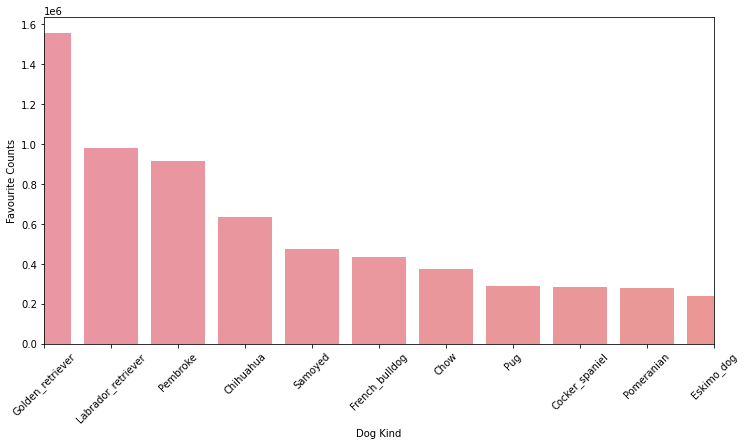

In [369]:
plt.figure(figsize=(12,6))

chart = sns.barplot(x='p1', 
            y="favorite_count", 
            data=fav_kind, 
            )

chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.xlim(0, 10)
plt.xlabel("Dog Kind", size=10)
plt.ylabel("Favourite Counts", size=10);

In [370]:
retweet_kind = twitter_archive_master.groupby(['p1']).agg({'retweet_count': 'sum'}).sort_values(by='retweet_count', ascending=False).reset_index()

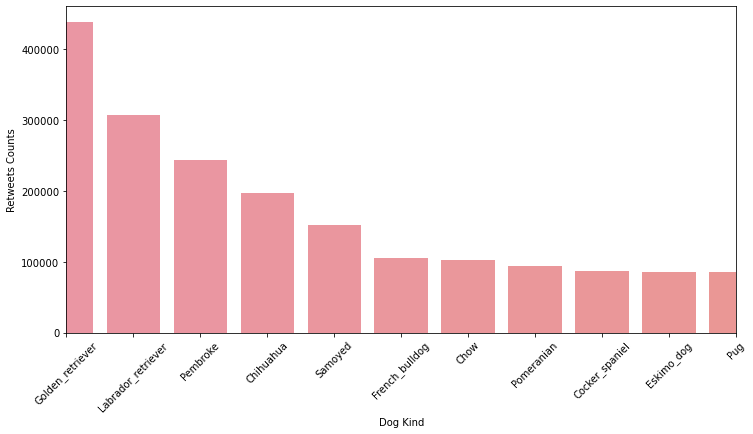

In [373]:
plt.figure(figsize=(12,6))

chart = sns.barplot(x='p1', 
            y="retweet_count", 
            data=retweet_kind, 
            )

chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.xlim(0, 10)
plt.xlabel("Dog Kind", size=10)
plt.ylabel("Retweets Counts", size=10);

We found that people have the same tendency to like and retweet the same dog kind in general, since the top 10 for both charts are mostly the same.

### What day of the week people like to tweet?

In [403]:
twitter_archive_master['timestamp'] = pd.to_datetime(twitter_archive_master.timestamp)
twitter_archive_master['weekday'] = twitter_archive_master['timestamp'].dt.dayofweek

In [404]:
twitter_archive_master['weekday'].replace(0, 'Monday', inplace=True)
twitter_archive_master['weekday'].replace(1, 'Tuesday', inplace=True)
twitter_archive_master['weekday'].replace(2, 'Wednesday', inplace=True)
twitter_archive_master['weekday'].replace(3, 'Thursday', inplace=True)
twitter_archive_master['weekday'].replace(4, 'Friday', inplace=True)
twitter_archive_master['weekday'].replace(5, 'Saturday', inplace=True)
twitter_archive_master['weekday'].replace(6, 'Sunday', inplace=True)

In [422]:
weekday_count = pd.DataFrame(twitter_archive_master.groupby('weekday')['tweet_id'].count()).reset_index()
weekday_count.sort_values(by=['tweet_id'], inplace=True,ascending=False)
weekday_count

,weekday,tweet_id
1,Monday,327
5,Tuesday,295
6,Wednesday,295
0,Friday,281
4,Thursday,281
3,Sunday,256
2,Saturday,252


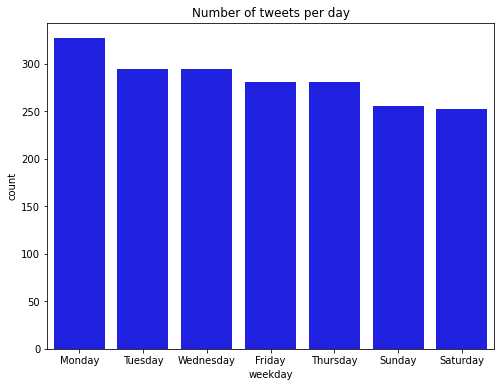

In [442]:
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(x="weekday", y="tweet_id", data=weekday_count, color='b')
ax.set_title('Number of tweets per day')
ax.set_ylabel('count', fontsize=10)
plt.xticks(rotation='horizontal');

This result is different than what people would usually think as people would tweet or use social media more in the weekends. This chart shows that people actually tweets more about dogs on Mondays.

### What is the most predicted dog kind?

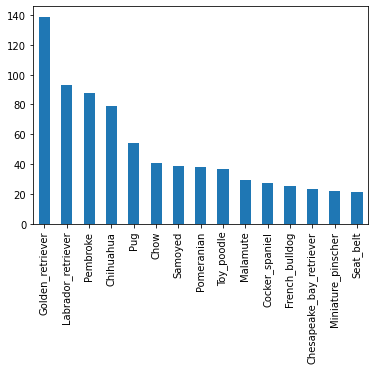

In [448]:
twitter_archive_master['p1'].value_counts()[:15].plot(kind="bar");

With the accurate prediction from the data, we can see that the most predicted dog kinds are golden retriever, Labrador retriever, and Pembroke. It can also tells that the number of images posted in the tweets are usually in positive correlation with this result.

## Reporting

Create a 300-600 word written report called wrangle_report.pdf or wrangle_report.html that briefly describes your wrangling efforts. This is to be framed as an internal document.

Create a 250-word-minimum written report called act_report.pdf or act_report.html that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.